# Perturbation Theory

We deal here with the calculation of the second-order corrections to the normal and anomalous Green's functions in the MTI-SC heterostructure.
In all that follows, we assume that the Hamiltonian can be written as $H = H_0 + V$, where $H_0 = H_{SC} + H_{MTI}$ is the Hamiltonian for the uncoupled materials and $V$ is the tunneling term.
Using interacting picture, we can write a perturbative series and compute the effect of proximity pairing in the MTI due to the superconductor.

In [1]:
import numpy as np

from GreenFunctions_MTI import GFexact
from GreenFunctions_SC import GFnormal, GFanomalous

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

## **Normal Green's Function**


Using interacting picture, the normal MTI Green's function
$$
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\hat{T}_t \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle \,,
$$
can be written in perturbative series as
$$
\begin{split}
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} \hat{T}_t
	\check{\psi}_{\sigma\lambda}(zt) 
	\check{V}(t_1) \dots \check{V}(t_n)	
	\check{\psi}^\dagger_{\sigma'\lambda'}(z't') 
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,.
\end{split}
$$
Since all the odd-order terms vanishes, the most important correction to the unperturbed Green's function is given by the *second order* one
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\frac{i}{2} \int dt_1 \, \int dt_2 \, 
	\left\langle
	\hat{T}_t \check{\psi}_{\sigma\lambda}(zt) \check{V}(t_1) \check{V}(t_2) \check{\psi}_{\sigma'\lambda'}^\dagger(z't')
	\right\rangle_0 = \\[5pt]
	%%%
	=&
	\sum_{ss't} \sum_{rr'l}
	\int dt_1 \, \int dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't')
	\mathcal{G}^{(0)}_{s' r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, st}(v t_2, w t_1)
	- \\[5pt]
	%
	& -	
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	\Bigr\} \,,
\end{split}
$$
which we expressed in terms of the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't')$ in the MTI and the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma, \sigma'}(zt,z't')$ in the SC.
The corresponding Feynman diagrams are plotted in the picture below:

<p style="text-align:center;">
<img src="Correction_NormalGF.png" width=85% height=85% class="center" />
</p>

Since the first one is a disconnected diagram, we can neglect it and the second-order correction to the normal MTI Green's function is thus given by
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	-\sum_{ss't} \sum_{rr'l}
	& \int dt_1 \, dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	\Bigr\} \,.
\end{split}
$$

Since the Hamiltonian does not depend explicitly on time $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't') \equiv \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t')$, and Fourier transforming from time to frequency space
$$
\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t') = 
\int \frac{d\omega}{2\pi} e^{-i\omega(t-t')} 
\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) \,,
$$
it is possible to reduce the time integrals to simple algebraic products 
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
	-\sum_{ss't} \sum_{rr'l}
	& \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	\Bigr\} \,.
\end{split}
$$

In [2]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(d, 200, 250); gfSC = np.array([GFnormal(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Green's Functions** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate. 
The unperturbed Green's function in the MTI $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$ and in the superconductor $\mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega)$ are also shown.
In our model we assumed that the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) \neq 0 
    \qquad \text{for} \quad 0 \leq z,z' \leq d \,,
$$
and, similarly, the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega) \neq 0 
    \qquad \text{for} \quad z-z' \geq d \,.
$$

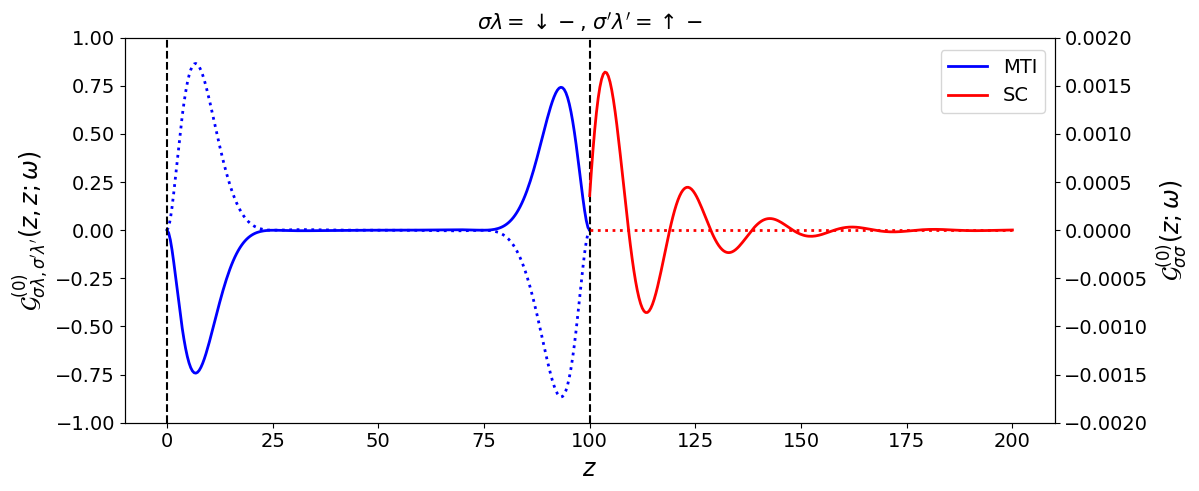

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 3; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')

# plot SC normal Green's function
axSC.plot(zSC, gfSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, gfSC.real, lw=2, color='red', label='SC')

axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)

# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.9, 0.875));

#### **Tunneling**

In order to evaluate the second order corrections to the Green's functions in the MTI, we need to make some specific assumption on the tunneling term.
In the following, we assume that the coupling function $\gamma_{\sigma \lambda}^{\sigma'}(z,z')$ for the tunneling from SC to MTI is given by
$$
    \gamma_{\sigma \lambda}^{\sigma'}(z,z') = \gamma_{\sigma \lambda}^{\sigma'} \,
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  \,,
$$
where the Dirac delta imposes that electrons tunneling from a material to the other mantain the same distance from the interface $z=d$.
Moreover, we assume that the tunneling amplitude decreases away from the interface following a Gaussian distribution with a tunneling length $\lambda_{tun}$.
The coupling function $\gamma_{\sigma \lambda}^{\sigma' \, \dagger}(z',z)$ for the opposite tunneling from MTI to SC can be written in a similar way as
$$
\begin{split}
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger}(z',z) &= 
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z'-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  = \\[5pt]
    %
    &=
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(2d-z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = \\[5pt]
    %
    &=
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack
    = \Bigl\lbrack \gamma_{\sigma \lambda}^{\sigma'}(z',z) \Bigr\rbrack^\star \,,
\end{split}
$$
where the Dirac delta imposes $z'=2d-z$.
Here and in the whole derivation, we used a notation where the primed indices refer to electrons in the superconductor.


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# function for tunneling amplitude 
def spatial_tunneling(z, d, lT):

    return np.exp( -(z-d)**2/(2*lT**2) )

As a last step before evaluating the integrals, we need to make concrete assumption on the spin and parity dependence of the coupling constant $\gamma_{\sigma \lambda}^{\sigma'}$.
Here, we consider the two following cases:

---
- i. **Spin-conserving tunneling** \
  As a first case we assume that the tunneling conserves the spin and does not depend on the value of spin or parity.
  Explicitly, we have that $ \gamma_{\sigma \lambda}^{\sigma'} = \gamma \delta_{\sigma\sigma'}$, with $\gamma$ complex constant.
  With such assumptions on the tunneling coupling, the second order correction to the normal Green's function becomes
  $$
    \begin{split}
	  \mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	  =
	  -\sum_{ss't} \sum_{rr'l}
	  & \int dw \, dw' \, \int dv \, dv' \,
	  \gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	  %
	  & \times
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	  \mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} = \\[5pt]
      %%%
      = -|\gamma|^2 \sum_{ss't} \sum_{rr'l} 
	  & \int dw \, dw' \, \int dv \, dv' \,
	  \delta_{ss'} \, \delta_{rr'} \,
      \delta(w+w'-2d) \, \delta(v'+v-2d) \, f(w) f(v) \\[5pt]
	  %
	  & \times
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	  \mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} = \\[5pt]
      %%%
      = - |\gamma|^2 \sum_{sr} \sum_{tl}
	  & \int dw \, dv \,
	  f(w) f(v) \,
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s,r}(2d-w, 2d-v; \omega)
	  \mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} 
      \,,
    \end{split}
  $$
  where we defined the Gaussian tunneling amplitude as
  $$
    f(z) \equiv \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack \,,
  $$
  and in the last line we used the fact that $w' = 2d-w$ and $v' = 2d-v$ in order to rewrite everything in terms of the MTI coordinates $w,v$.
  Recalling that the SC unperturbed Green's function is translational invariant
  $$
    \mathcal{G}^{(0)}_{s,r}(2d-w, 2d-v; \omega) = 
    \mathcal{G}^{(0)}_{s,r}(v-w; \omega) \,,
  $$
  and diagonal in spin space, we finally obtain
  $$
	  \mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
      = - |\gamma|^2 \sum_{s} \sum_{t,l}
	  \int dw \, dv \, f(w) f(v) \,
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s}(v-w; \omega)
	  \mathcal{G}^{(0)}_{sl, \sigma'\lambda'}(v, z'; \omega) \,.
  $$


  
---
- i. **Spin-flipping tunneling** \
  As a second option we address the case of a spin-flipping tunneling, i.e. $\gamma_{\sigma \lambda}^{\sigma'} = \gamma \delta_{\sigma -\sigma'}$.
  In this case, the second order correction can be written as
  $$
    \begin{split}
	  \mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	  =
      -|\gamma|^2 \sum_{ss't} \sum_{rr'l} 
	  & \int dw \, dw' \, \int dv \, dv' \,
	  \delta_{s-s'} \, \delta_{r-r'} \,
      \delta(w+w'-2d) \, \delta(v'+v-2d) \, f(w) f(v) \\[5pt]
	  %
	  & \times
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	  \mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} = \\[5pt]
      %%%
      = - |\gamma|^2 \sum_{sr} \sum_{tl}
	  & \int dw \, dv \,
	  f(w) f(v) \,
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{-s,-r}(v-w; \omega)
	  \mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} 
      \,.
    \end{split}
  $$
  Using the fact that the SC unperturbed normal Green's function is proportional to the identity in spin space 
  $$
    \mathcal{G}^{(0)}_{-s,-r}(v-w; \omega) =
    \delta_{-s-r} \mathcal{G}^{(0)}_{-s,-s}(v-w; \omega) =
    \delta_{sr} \mathcal{G}^{(0)}_{s,s}(v-w; \omega) \,,
  $$
  we can finally obtain
  $$
    \mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
      =
      - |\gamma|^2 \sum_{s} \sum_{tl}
	  \int dw \, dv \, f(w) f(v) \,
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s,s}(v-w; \omega)
	  \mathcal{G}^{(0)}_{sl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\} \,.
  $$

These two cases can be seen as opposite limit of a more generic situation where spin can be only partly flipped or conserved. 
Since they yield the same result we can compute the second-order correction as
$$
    \mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
      =
      \boxed{
      - |\gamma|^2 \sum_{s} \sum_{tl}
	  \int dw \, dv \, f(w) f(v) \,
	  \Bigl\{
	  \mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	  \mathcal{G}^{(0)}_{s,s}(v-w; \omega)
	  \mathcal{G}^{(0)}_{sl, \sigma'\lambda'}(v, z'; \omega)
	  \Bigr\}
    } \,.
$$

## **Anomalous Green's Function**

<p style="text-align:center;">
<img src="Correction_AnomalousGF.png" width=85% height=85% class="center" />
</p>